In [1]:
!pip install hf_xet

In [2]:
from diffusers import StableDiffusionXLPipeline
import torch
import matplotlib.pyplot as plt

In [3]:
pretrained_model = "stabilityai/stable-diffusion-xl-base-1.0"
prompt = "Sketch drawing of a 90s Formula 1 car"
negative_prompt = "blurry, low quality, graystyle, monochrome, dull, dark"
num_inference_steps = 50
guidence_scale = 7.5
height = 768
width = 768
seed = 42

In [4]:
generator = torch.manual_seed(seed)
pipeline = StableDiffusionXLPipeline.from_pretrained(
    pretrained_model,
    torch_dtype=torch.float16,
    use_safetensor=True
).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Keyword arguments {'use_safetensor': True} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
image = pipeline(
    prompt = prompt,
    negative_prompt = negative_prompt,
    height = height,
    width = width,
    num_inference_steps = num_inference_steps,
    guidence_scale = guidence_scale,
    generator = generator
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

<function matplotlib.pyplot.show(close=None, block=None)>

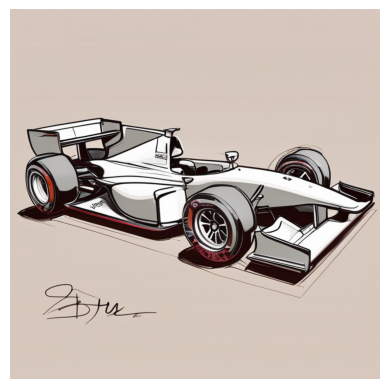

In [8]:
plt.imshow(image)
plt.axis("off")
plt.show